In [ ]:
### Mise en situation

Une enquête a été réalisée et porte sur la consommmation de thé.

### Objectifs

> Premier objectif : Utiliser la librairie FactoMineR pour réaliser une étude ACM, sur les données de thé. Le cas d'étude s'appuie sur le lien suivant :

http://factominer.free.fr/course/doc/AnaDo_ACM_Facto_The_Markdown.pdf

On étudie les individus, les variables et les modalités.

Etude des individus : deux individus sont prochez s'ils ont répondu de la même façon aux questions. On ne s'intéressera pas vraiment aux individus en tant que tels mais plutôt aux populations : y a-t-il des groupes d'individus ?

Etude des variables et des modalités : les questions sont les mêmes que pour l'ACP. Premièrement, on veut étudier les relations entre variables et les associations entre modalités. Deux modalités sont proches si elles ont souvent été prises ensemble. Deuxièmement, on recherche une ou plusieurs variable(s) synthétique(s) continue(s) pour résumer les variables qualitatives. Troisièmement, on cherche à caractériser des groupes d'individus par des modalités.

> Deuxième objectif : Appliquer cette méthodologie ACM sur l'intoxication alimentaire chez les enfants, sur la base du jeu de données : poison.csv

In [1]:
library(FactoMineR)

In [2]:
# Cas d'usage 1 :

## Importation d'un jeu de données depuis le site

In [3]:
the <- read.table("http://factominer.free.fr/livre/the.csv", header=TRUE, sep=";", fileEncoding="latin1")

In [13]:
head(the,10)

ptt.dèj     goûter     soirée     après.déjeuner après.dîner    
1  ptt dèj     Pas.goûter Pas.soirée Pas.après dèj  Pas.après dîner
2  ptt dèj     Pas.goûter Pas.soirée Pas.après dèj  Pas.après dîner
3  Pas.ptt dèj goûter     soirée     Pas.après dèj  après dîner    
4  Pas.ptt dèj Pas.goûter Pas.soirée Pas.après dèj  après dîner    
5  ptt dèj     Pas.goûter soirée     Pas.après dèj  Pas.après dîner
6  Pas.ptt dèj Pas.goûter Pas.soirée Pas.après dèj  après dîner    
7  ptt dèj     goûter     Pas.soirée Pas.après dèj  Pas.après dîner
8  Pas.ptt dèj goûter     soirée     Pas.après dèj  Pas.après dîner
9  ptt dèj     goûter     Pas.soirée Pas.après dèj  Pas.après dîner
10 ptt dèj     Pas.goûter soirée     Pas.après dèj  Pas.après dîner
   tt.moment     maison travail     salon.de.t     amis     ⋯
1  Pas.tt moment maison Pas.travail Pas.salon de t Pas.amis ⋯
2  Pas.tt moment maison Pas.travail Pas.salon de t Pas.amis ⋯
3  Pas.tt moment maison travail     Pas.salon de t amis     ⋯
4  Pas.tt moment maison Pas.travail Pas.salon de t Pas.amis ⋯
5  tt moment     maison Pas.travail Pas.salon de t Pas.amis ⋯
6  Pas.tt moment maison Pas.travail Pas.salon de t Pas.amis ⋯
7  Pas.tt moment maison Pas.travail Pas.salon de t amis     ⋯
8  Pas.tt moment maison Pas.travail Pas.salon de t Pas.amis ⋯
9  Pas.tt moment maison Pas.travail Pas.salon de t Pas.amis ⋯
10 Pas.tt moment maison Pas.travail salon de t     Pas.amis ⋯
   bon.pr.la.santé     diurétique     convivialité     absorption.fer    
1  bon pr la santé     Pas.diurétique Pas.convivialité Pas.absorption fer
2  bon pr la santé     diurétique     Pas.convivialité Pas.absorption fer
3  bon pr la santé     diurétique     convivialité     Pas.absorption fer
4  bon pr la santé     Pas.diurétique Pas.convivialité Pas.absorption fer
5  Pas.bon pr la santé diurétique     convivialité     Pas.absorption fer
6  bon pr la santé     Pas.diurétique Pas.convivialité Pas.absorption fer
7  bon pr la santé     Pas.diurétique Pas.convivialité Pas.absorption fer
8  bon pr la santé     Pas.diurétique convivialité     Pas.absorption fer
9  Pas.bon pr la santé Pas.diurétique Pas.convivialité Pas.absorption fer
10 bon pr la santé     diurétique     convivialité     Pas.absorption fer
   féminin     raffiné     amaigrissant     excitant     relaxant    
1  Pas.féminin Pas.raffiné Pas.amaigrissant Pas.excitant Pas.relaxant
2  Pas.féminin Pas.raffiné Pas.amaigrissant excitant     Pas.relaxant
3  Pas.féminin Pas.raffiné Pas.amaigrissant Pas.excitant relaxant    
4  Pas.féminin raffiné     Pas.amaigrissant Pas.excitant relaxant    
5  Pas.féminin Pas.raffiné Pas.amaigrissant Pas.excitant relaxant    
6  Pas.féminin Pas.raffiné Pas.amaigrissant Pas.excitant relaxant    
7  Pas.féminin Pas.raffiné Pas.amaigrissant Pas.excitant relaxant    
8  féminin     raffiné     Pas.amaigrissant Pas.excitant relaxant    
9  Pas.féminin raffiné     Pas.amaigrissant Pas.excitant relaxant    
10 Pas.féminin Pas.raffiné Pas.amaigrissant Pas.excitant relaxant    
   ss.effet.santé    
1  Pas.ss effet santé
2  Pas.ss effet santé
3  Pas.ss effet santé
4  Pas.ss effet santé
5  Pas.ss effet santé
6  Pas.ss effet santé
7  Pas.ss effet santé
8  Pas.ss effet santé
9  Pas.ss effet santé
10 Pas.ss effet santé

In [8]:
the[19:21,19:36]

sexe CSP       Sport       âge âge_Q   fréquence   évasion.exotisme    
19 F    non actif Pas.sportif 73  60 et + + de 2/jour évasion-exotisme    
20 F    non actif sportif     80  60 et + + de 2/jour Pas.évasion-exotisme
21 F    non actif Pas.sportif 76  60 et + + de 2/jour évasion-exotisme    
   spiritualité     bon.pr.la.santé     diurétique     convivialité    
19 Pas.spiritualité Pas.bon pr la santé Pas.diurétique Pas.convivialité
20 Pas.spiritualité bon pr la santé     Pas.diurétique convivialité    
21 Pas.spiritualité bon pr la santé     diurétique     convivialité    
   absorption.fer     féminin     raffiné     amaigrissant     excitant    
19 Pas.absorption fer Pas.féminin raffiné     Pas.amaigrissant Pas.excitant
20 Pas.absorption fer féminin     raffiné     Pas.amaigrissant Pas.excitant
21 absorption fer     Pas.féminin Pas.raffiné Pas.amaigrissant excitant    
   relaxant     ss.effet.santé    
19 relaxant     Pas.ss effet santé
20 relaxant     Pas.ss effet santé
21 Pas.relaxant Pas.ss effet santé

In [27]:
str(the)

'data.frame':	300 obs. of  36 variables:
 $ ptt.dèj         : Factor w/ 2 levels "Pas.ptt dèj",..: 2 2 1 1 2 1 2 1 2 2 ...
 $ goûter          : Factor w/ 2 levels "goûter","Pas.goûter": 2 2 1 2 2 2 1 1 1 2 ...
 $ soirée          : Factor w/ 2 levels "Pas.soirée","soirée": 1 1 2 1 2 1 1 2 1 2 ...
 $ après.déjeuner  : Factor w/ 2 levels "après dèj","Pas.après dèj": 2 2 2 2 2 2 2 2 2 2 ...
 $ après.dîner     : Factor w/ 2 levels "après dîner",..: 2 2 1 1 2 1 2 2 2 2 ...
 $ tt.moment       : Factor w/ 2 levels "Pas.tt moment",..: 1 1 1 1 2 1 1 1 1 1 ...
 $ maison          : Factor w/ 2 levels "maison","Pas.maison": 1 1 1 1 1 1 1 1 1 1 ...
 $ travail         : Factor w/ 2 levels "Pas.travail",..: 1 1 2 1 1 1 1 1 1 1 ...
 $ salon.de.t      : Factor w/ 2 levels "Pas.salon de t",..: 1 1 1 1 1 1 1 1 1 2 ...
 $ amis            : Factor w/ 2 levels "amis","Pas.amis": 2 2 1 2 2 2 1 2 2 2 ...
 $ resto           : Factor w/ 2 levels "Pas.resto","resto": 1 1 2 1 1 1 1 1 1 1 ...
 $ bar             : F

# ACM avec la librairie FactoMineR

In [11]:
res <- MCA(the, quanti.sup=22, quali.sup=c(19:21,23:36))

In [14]:
str(res)

List of 7
 $ eig       : num [1:27, 1:3] 0.1483 0.1215 0.09 0.0781 0.0737 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:27] "dim 1" "dim 2" "dim 3" "dim 4" ...
  .. ..$ : chr [1:3] "eigenvalue" "percentage of variance" "cumulative percentage of variance"
 $ call      :List of 13
  ..$ X         :'data.frame':	300 obs. of  36 variables:
  .. ..$ ptt.dèj         : Factor w/ 2 levels "Pas.ptt dèj",..: 2 2 1 1 2 1 2 1 2 2 ...
  .. ..$ goûter          : Factor w/ 2 levels "goûter","Pas.goûter": 2 2 1 2 2 2 1 1 1 2 ...
  .. ..$ soirée          : Factor w/ 2 levels "Pas.soirée","soirée": 1 1 2 1 2 1 1 2 1 2 ...
  .. ..$ après.déjeuner  : Factor w/ 2 levels "après dèj","Pas.après dèj": 2 2 2 2 2 2 2 2 2 2 ...
  .. ..$ après.dîner     : Factor w/ 2 levels "après dîner",..: 2 2 1 1 2 1 2 2 2 2 ...
  .. ..$ tt.moment       : Factor w/ 2 levels "Pas.tt moment",..: 1 1 1 1 2 1 1 1 1 1 ...
  .. ..$ maison          : Factor w/ 2 levels "maison","Pas.maison": 1 1 1 1 1 1 1 1 1 1 ...
  .. .

In [15]:
res

**Results of the Multiple Correspondence Analysis (MCA)**
The analysis was performed on 300 individuals, described by 36 variables
*The results are available in the following objects:

   name                description                                           
1  "$eig"              "eigenvalues"                                         
2  "$var"              "results for the variables"                           
3  "$var$coord"        "coord. of the categories"                            
4  "$var$cos2"         "cos2 for the categories"                             
5  "$var$contrib"      "contributions of the categories"                     
6  "$var$v.test"       "v-test for the categories"                           
7  "$ind"              "results for the individuals"                         
8  "$ind$coord"        "coord. for the individuals"                          
9  "$ind$cos2"         "cos2 for the individuals"                            
10 "$ind$contrib"      "contributio

## Résumé des principaux résultats

Pour éviter de surcharger les sorties, on a précisé dans la fonction summary.MCA, appelée par summary, que
l’on veut les résultats sur les 8 (nbelements=8) premiers éléments (individus et modalités), et uniquement
sur les 2 premières dimensions (ncp=2)

In [16]:
summary(res, ncp=2, nbelements=10)


Call:
MCA(X = the, quanti.sup = 22, quali.sup = c(19:21, 23:36)) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance               0.148   0.122   0.090   0.078   0.074   0.071   0.068
% of var.              9.885   8.103   6.001   5.204   4.917   4.759   4.522
Cumulative % of var.   9.885  17.988  23.989  29.192  34.109  38.868  43.390
                       Dim.8   Dim.9  Dim.10  Dim.11  Dim.12  Dim.13  Dim.14
Variance               0.065   0.062   0.059   0.057   0.054   0.052   0.049
% of var.              4.355   4.123   3.902   3.805   3.628   3.462   3.250
Cumulative % of var.  47.745  51.867  55.769  59.574  63.202  66.664  69.914
                      Dim.15  Dim.16  Dim.17  Dim.18  Dim.19  Dim.20  Dim.21
Variance               0.048   0.047   0.046   0.040   0.038   0.037   0.036
% of var.              3.221   3.127   3.037   2.683   2.541   2.438   2.378
Cumulative % of var.  73.135  76.262  79.298  81.982  84.523  86.961  89

## Matrice complète recalculée

La fonction summary.MCA permet de précider le nombre de composantes avec ncp pour lequel les résultats
sont fournis, et l’argument nbelements=Inf permet de préciser qu’on veut les résultats sur tous les individus.

> Définition du ncp : nombdre de dimensions restantes à l'affichage


In [17]:
summary(res, ncp=3, nbelements=Inf)


Call:
MCA(X = the, quanti.sup = 22, quali.sup = c(19:21, 23:36)) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance               0.148   0.122   0.090   0.078   0.074   0.071   0.068
% of var.              9.885   8.103   6.001   5.204   4.917   4.759   4.522
Cumulative % of var.   9.885  17.988  23.989  29.192  34.109  38.868  43.390
                       Dim.8   Dim.9  Dim.10  Dim.11  Dim.12  Dim.13  Dim.14
Variance               0.065   0.062   0.059   0.057   0.054   0.052   0.049
% of var.              4.355   4.123   3.902   3.805   3.628   3.462   3.250
Cumulative % of var.  47.745  51.867  55.769  59.574  63.202  66.664  69.914
                      Dim.15  Dim.16  Dim.17  Dim.18  Dim.19  Dim.20  Dim.21
Variance               0.048   0.047   0.046   0.040   0.038   0.037   0.036
% of var.              3.221   3.127   3.037   2.683   2.541   2.438   2.378
Cumulative % of var.  73.135  76.262  79.298  81.982  84.523  86.961  89

## Description des dimensions

> Compléte :

In [18]:
dimdesc(res)

$`Dim 1`
$`Dim 1`$quali
                       R2      p.value
lieuachat      0.41793014 1.255462e-35
salon.de.t     0.37189109 6.082138e-32
forme          0.29882863 1.273180e-23
amis           0.24319952 8.616289e-20
resto          0.22646759 2.319804e-18
goûter         0.19203800 1.652462e-15
type           0.21609382 4.050469e-14
bar            0.14722360 5.846592e-12
travail        0.11153590 3.000872e-09
comment        0.10285191 4.796010e-07
variété        0.08950330 8.970954e-07
après.déjeuner 0.07458227 1.570629e-06
fréquence      0.09438792 1.849071e-06
convivialité   0.07132511 2.706357e-06
soirée         0.05311759 5.586801e-05
tt.moment      0.04479873 2.219503e-04
sexe           0.03335969 1.487620e-03
après.dîner    0.03289362 1.608077e-03
ptt.dèj        0.02539639 5.667604e-03
sucre          0.01527654 3.234986e-02

$`Dim 1`$category
                    Estimate      p.value
GMS+mag.spé.      0.33853776 1.344557e-35
salon de t        0.29731072 6.082138e-32
sachet+vrac       0.23457030 1.361423e-21
amis              0.19950832 8.616289e-20
resto             0.20802605 2.319804e-18
goûter            0.17011357 1.652462e-15
bar               0.18137133 5.846592e-12
t_variable        0.27595067 5.956230e-12
travail           0.14170406 3.000872e-09
+ de 2/jour       0.14855615 7.380937e-07
après dèj         0.14862636 1.570629e-06
convivialité      0.13020388 2.706357e-06
autre             0.38192443 9.244911e-06
soirée            0.09345270 5.586801e-05
tt moment         0.08582336 2.219503e-04
F                 0.07158886 1.487620e-03
Pas.après dîner   0.13685745 1.608077e-03
citron            0.01223478 3.515252e-03
ptt dèj           0.06141392 5.667604e-03
cadre sup         0.16802844 8.886876e-03
parfumé           0.12203299 1.547110e-02
Pas.sucré         0.04761975 3.234986e-02
sucré            -0.04761975 3.234986e-02
1 à 2/sem        -0.10430402 1.829818e-02
t_MDD            -0.11979263 1.156245e-02
Pas.ptt dèj      -0.06141392 5.667604e-03
après dîner      -0.13685745 1.608077e-03
H                -0.07158886 1.487620e-03
pur              -0.23140428 2.326233e-04
Pas.tt moment    -0.08582336 2.219503e-04
1/jour           -0.10038745 1.556219e-04
Pas.soirée       -0.09345270 5.586801e-05
Pas.convivialité -0.13020388 2.706357e-06
Pas.après dèj    -0.14862636 1.570629e-06
vert             -0.24569103 1.281162e-07
Pas.travail      -0.14170406 3.000872e-09
t_marque_connue  -0.10910793 1.116908e-09
Pas.bar          -0.18137133 5.846592e-12
Pas.goûter       -0.17011357 1.652462e-15
Pas.resto        -0.20802605 2.319804e-18
Pas.amis         -0.19950832 8.616289e-20
sachet           -0.23182447 8.877561e-22
GMS              -0.24012436 3.008256e-27
Pas.salon de t   -0.29731072 6.082138e-32


$`Dim 2`
$`Dim 2`$quanti
    correlation      p.value
âge   0.2035108 0.0003890693

$`Dim 2`$quali
                       R2      p.value
lieuachat      0.62550194 4.542155e-64
type           0.56056797 1.837909e-50
forme          0.51288621 4.103156e-47
variété        0.16034278 5.359827e-12
resto          0.05883014 2.165287e-05
âge_Q          0.07663110 9.613084e-05
après.dîner    0.04764166 1.385133e-04
travail        0.04334283 2.825934e-04
sucre          0.03078909 2.286813e-03
comment        0.04300447 4.565763e-03
après.déjeuner 0.02609615 5.035226e-03
ptt.dèj        0.02554407 5.527765e-03
raffiné        0.02298649 8.531637e-03
salon.de.t     0.02159669 1.081515e-02
CSP            0.05335498 1.284774e-02
sexe           0.01734823 2.250375e-02
amis           0.01527530 3.235693e-02

$`Dim 2`$category
                      Estimate      p.value
magasin spécialisé  0.56623933 3.435386e-58
t_haut_de_gamme     0.58675674 6.819842e-53
vrac                0.47523577 4.876111e-43
vert                0.17636551 5.660702e-07
Pas.resto           0.09599600 2.165287e-05
noir                0.02833892 1.280976e-04
après dîner         0.14912299 1.385133e-04
Pas.travail         0.07997829 2.825934e-04
Pas.sucré           0.06120846

> Partielle sur 2 axes :
Pour éviter d’avoir trop de modalités, on ne décrit que les axes 1 et 2 et on conserve uniquement les modalités
qui ont une probabilité critique inférieure à 10−5 au lieu de 0.05 par défaut.

In [19]:
dimdesc(res, axes=c(1,2), proba=1e-05)

$`Dim 1`
$`Dim 1`$quali
                       R2      p.value
lieuachat      0.41793014 1.255462e-35
salon.de.t     0.37189109 6.082138e-32
forme          0.29882863 1.273180e-23
amis           0.24319952 8.616289e-20
resto          0.22646759 2.319804e-18
goûter         0.19203800 1.652462e-15
type           0.21609382 4.050469e-14
bar            0.14722360 5.846592e-12
travail        0.11153590 3.000872e-09
comment        0.10285191 4.796010e-07
variété        0.08950330 8.970954e-07
après.déjeuner 0.07458227 1.570629e-06
fréquence      0.09438792 1.849071e-06
convivialité   0.07132511 2.706357e-06

$`Dim 1`$category
                   Estimate      p.value
GMS+mag.spé.      0.3385378 1.344557e-35
salon de t        0.2973107 6.082138e-32
sachet+vrac       0.2345703 1.361423e-21
amis              0.1995083 8.616289e-20
resto             0.2080260 2.319804e-18
goûter            0.1701136 1.652462e-15
bar               0.1813713 5.846592e-12
t_variable        0.2759507 5.956230e-12
travail           0.1417041 3.000872e-09
+ de 2/jour       0.1485561 7.380937e-07
après dèj         0.1486264 1.570629e-06
convivialité      0.1302039 2.706357e-06
autre             0.3819244 9.244911e-06
Pas.convivialité -0.1302039 2.706357e-06
Pas.après dèj    -0.1486264 1.570629e-06
vert             -0.2456910 1.281162e-07
Pas.travail      -0.1417041 3.000872e-09
t_marque_connue  -0.1091079 1.116908e-09
Pas.bar          -0.1813713 5.846592e-12
Pas.goûter       -0.1701136 1.652462e-15
Pas.resto        -0.2080260 2.319804e-18
Pas.amis         -0.1995083 8.616289e-20
sachet           -0.2318245 8.877561e-22
GMS              -0.2401244 3.008256e-27
Pas.salon de t   -0.2973107 6.082138e-32


$`Dim 2`
$`Dim 2`$quali
                 R2      p.value
lieuachat 0.6255019 4.542155e-64
type      0.5605680 1.837909e-50
forme     0.5128862 4.103156e-47
variété   0.1603428 5.359827e-12

$`Dim 2`$category
                     Estimate      p.value
magasin spécialisé  0.5662393 3.435386e-58
t_haut_de_gamme     0.5867567 6.819842e-53
vrac                0.4752358 4.876111e-43
vert                0.1763655 5.660702e-07
15-24              -0.1634255 4.501578e-06
t_marque_connue    -0.1124757 8.001515e-07
parfumé            -0.2047044 6.499738e-12
sachet             -0.3175565 2.123707e-18
GMS                -0.3689186 5.804094e-23

## Graphes en écrivant certains libellés et pas d'autres

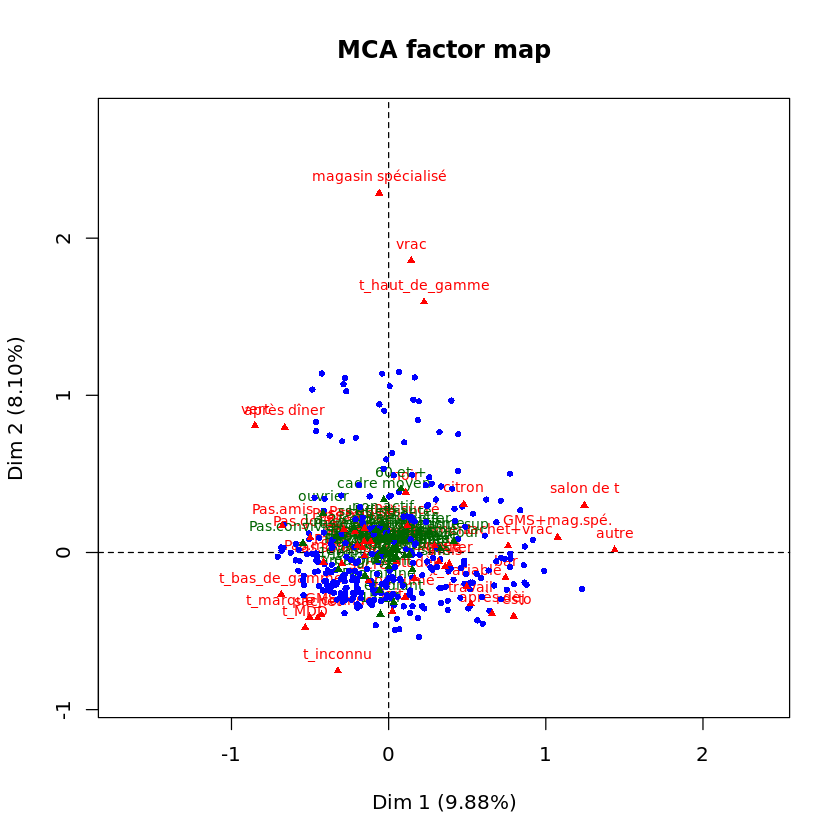

In [29]:
plot(res, label=c("var","quali.sup"), cex=0.7)

## Graphes en rendant invisibles certains éléments

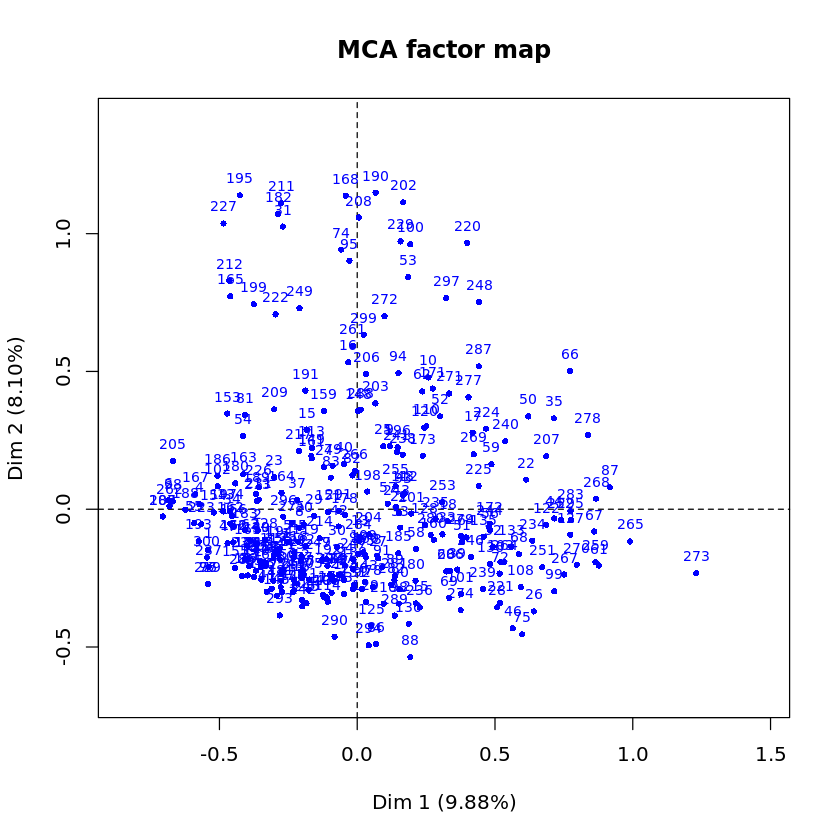

In [23]:
plot(res, invisible=c("var","quali.sup"), cex=0.7)
#Ici on n'affiche que les individus

## Graphe avec les individus et les modalités supplémentaires invisibles et donc avec uniquement les modalités actives

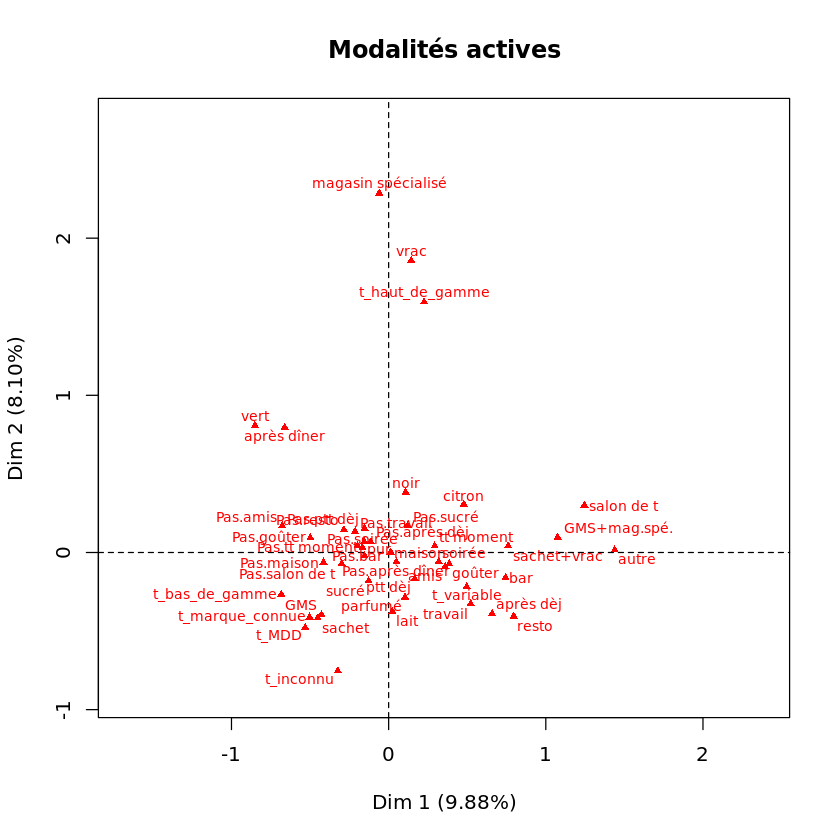

In [34]:
plot(res, invisible=c("ind","quali.sup"), autoLab="y", cex=0.7, title="Modalités actives")

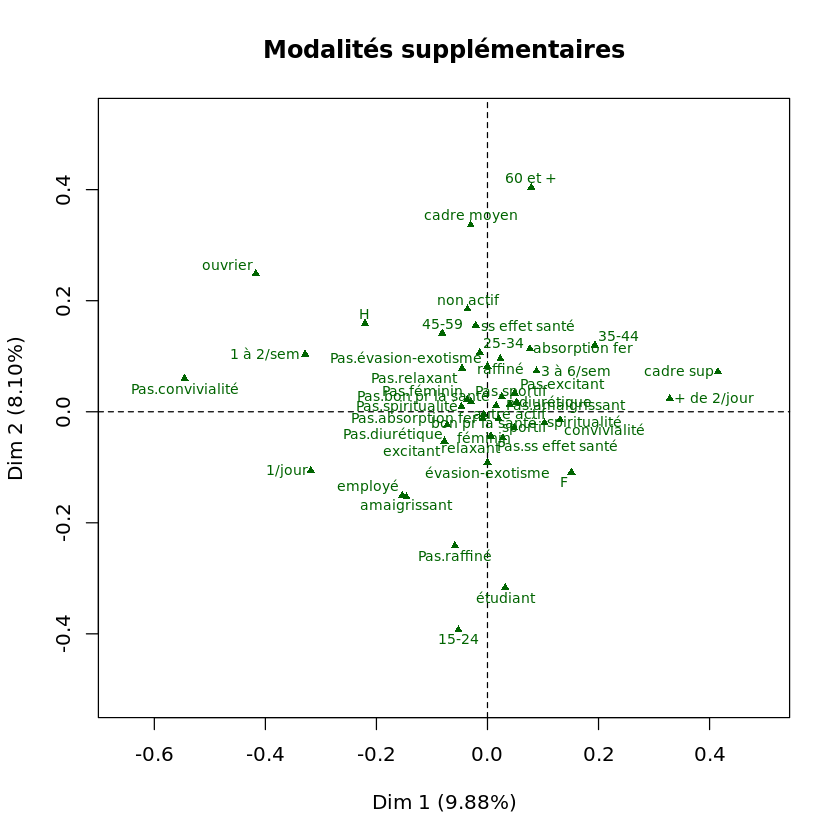

In [36]:
plot(res, invisible=c("ind","var"), autoLab="y", cex=0.7, title="Modalités supplémentaires")

## Sélection de certaines modalités

selectMod="cos2 0.7" : sélectionne les modalités actives et supplémentaires qui ont, sur le plan tracé, une
qualité de projection supérieure à 0.7

selectMod="cos2 5" : sélectionne les 5 modalités, 5 actives et 5 supplémentaires, qui ont la meilleure qualité
de projection sur le plan tracé

selectMod="contrib 5" : sélectionne les 5 modalités (nécessairement actives) qui ont le plus contribué à la
construction du plan tracé

selectMod="dist 5" : sélectionne les 5 modalités, 5 actives et ( supplémentaires) les plus loin de l’origine
des axes


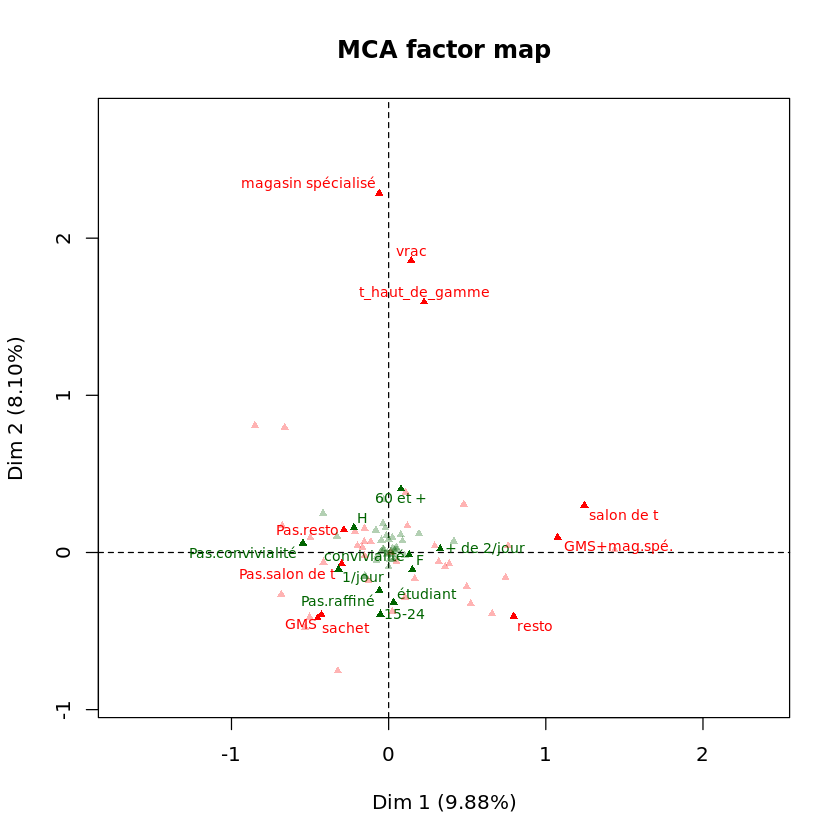

In [35]:
plot(res, invisible="ind",autoLab="y",cex=0.7,selectMod="cos2 10")

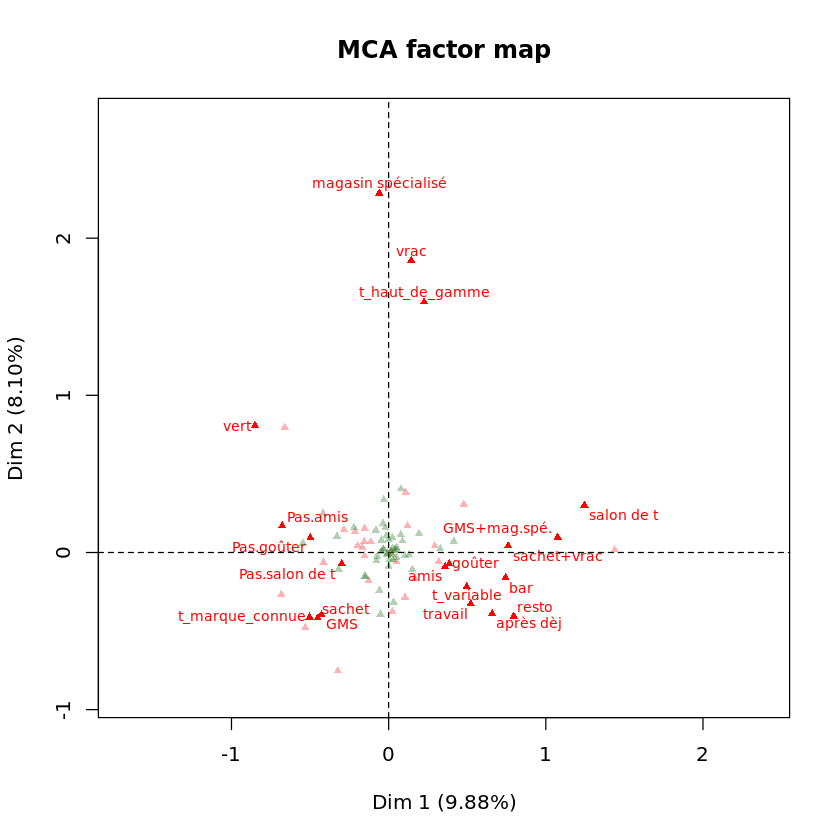

In [37]:
plot(res, invisible="ind",autoLab="y",cex=0.7,selectMod="contrib 20")

## Sélection des individus

Pour les individus, on utilise l’argument **select** au lieu de **selectMod** exactement de la même façon que pour
les modalités.

In [38]:
plot(res, invisible=c("var","quali.sup"),autoLab="y",cex=0.7,select="cos2 20")

## Combinaison de deux fonctions de sélection

On peut construire un graphe simultanée et sélectionner à la fois des individus avec **select** et des modalités
avec **selectMod**.

In [39]:
plot(res, autoLab="y",cex=0.7, select="cos2 20", selectMod="cos2 10")

## Graphe de variables

On peut construire le graphe des liaisons.

Pour les variables qualitatives, la coordonnée sur un axe est le rapport de corrélation au carré entre la variable qualitative et la dimension; 

pour les variables quantitatives supplémentaires, on calcule le coefficient de corrélation au carré entre la dimension et la variable quantitative.

On zoome ici sur les graphes en précisant les intervalles sur x et y avec xlim et ylim.

In [40]:
plot(res, choix="var",xlim=c(0,0.6),ylim=c(0,0.6))

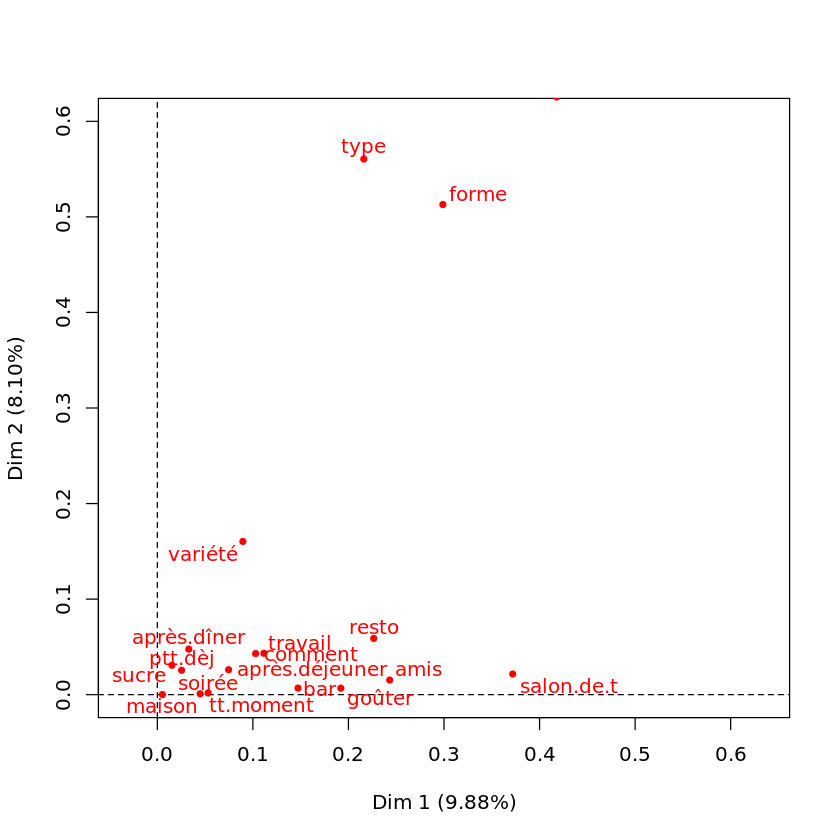

In [41]:
plot(res, choix="var",xlim=c(0,0.6),ylim=c(0,0.6),invisible=c("quali.sup","quanti.sup"))

## Graphes sur les axes 3 et 4

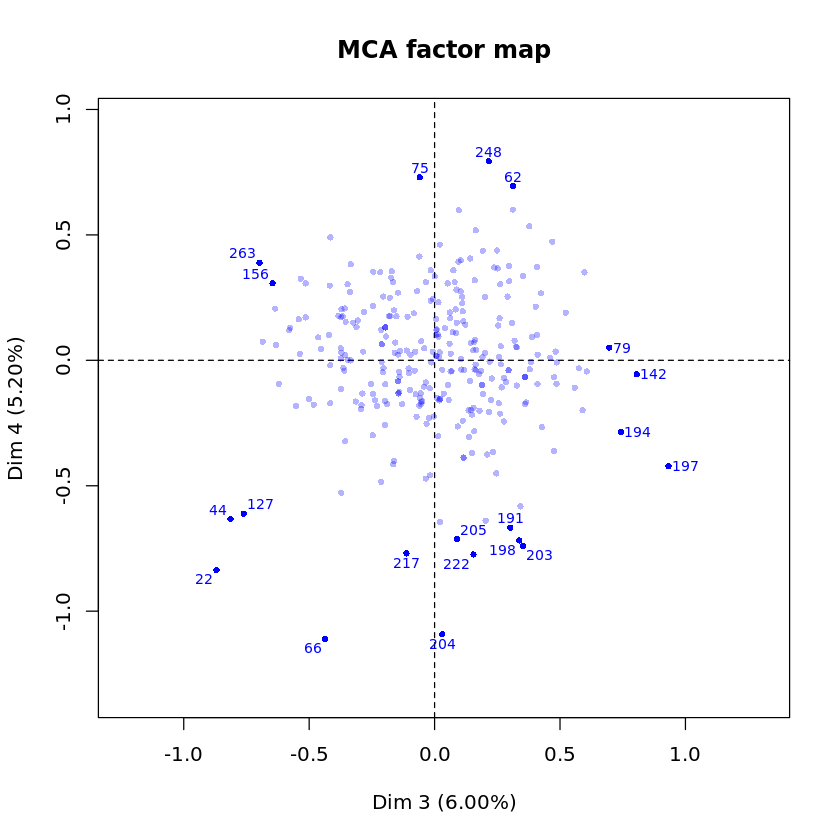

In [42]:
plot(res,invisible=c("var","quali.sup"),cex=0.7,select="contrib 20",axes=3:4)

In [43]:
plot(res, invisible="ind",autoLab="y",cex=0.7,selectMod="cos2 5",axes=3:4)

## Ellipses de confiance autour des modalités

On peut construire des ellipses de confiance autour des modalités de chaque variable. Par défaut un graphe
est construit par variable. On précise ici avec keepvar les variables pour lesquelles nous voulons un graphe.

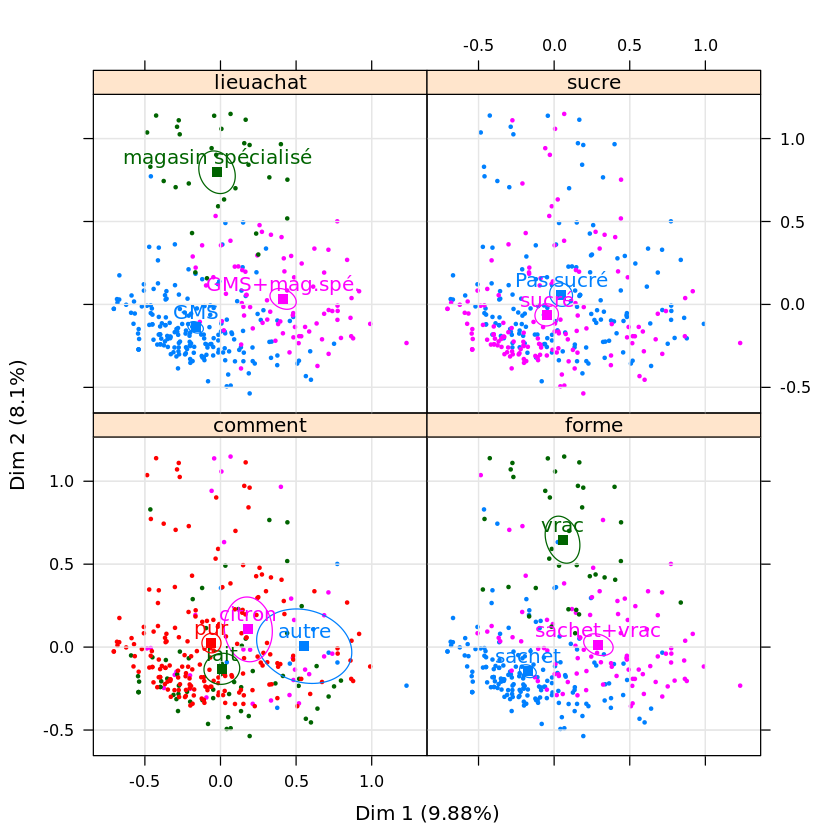

In [44]:
plotellipses(res,keepvar=c(14:17), axes=1:2)